In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import numpy as np
import scipy.stats as st
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import kernel_ridge
from sklearn import neighbors
from sklearn.ensemble import BaggingClassifier 
from sklearn import svm
from sklearn import dummy

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import timeit

import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster


pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

In [141]:
def diagnose(gb, params):
        test_score=np.zeros((params['n_estimators']), dtype=np.float64)
        
        for i, y_pred in enumerate(gb.staged_predict(X_test)):
            test_score[i]=gb.loss_(y_test, y_pred)
            
        plt.figure(figsize=(12,9))
        plt.title('Deviance')
        plt.plot(np.arange(params['n_estimators'])+1, gb.train_score_,'b-',label='Training Set Deviance')
        plt.plot(np.arange(params['n_estimators'])+1, test_score,'r-',label='Test Set Deviance')
        plt.legend(loc='upper right')
        plt.xlabel('Boosting Iterations')
        plt.ylabel('Deviance')
        plt.show()

In [142]:
def RMSE_naif(X_train_std,y_train,X_test_std,y_test):

    dum = dummy.DummyRegressor(strategy='mean')

    # Entraînement
    dum.fit(X_train_std, y_train)

    # Prédiction sur le jeu de test
    y_pred_dum = dum.predict(X_test_std)

    # Evaluate
    print("RMSE naïf: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum))))
    
    

def graphique_prediction_vs_naif(y,y_test,y_pred):
    sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
    for (yt, yp) in zip(list(y_test), list(y_pred)):
        if (yt, yp) in sizes:
            sizes[(yt, yp)] += 1
        else:
            sizes[(yt, yp)] = 1
      
    keys = sizes.keys()
    plt.figure(figsize=(12,9))
    plt.scatter(
            [k[0] for k in keys], # vraie valeur (abscisse)
            [k[1] for k in keys], # valeur predite (ordonnee)
            #s=[sizes[k] for k in keys], # taille du marqueur
            s=10,
            color='coral', alpha=0.8, label='Prédiction ML')

    y_pred_random = np.random.uniform(np.min(y), np.max(y),y_test.shape)
    
    sizes_random = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
    for (yt, yp) in zip(list(y_test), list(y_pred_random)):
        if (yt, yp) in sizes_random:
            sizes_random[(yt, yp)] += 1
        else:
            sizes_random[(yt, yp)] = 1

    keys = sizes_random.keys()
    plt.scatter(
            [k[0] for k in keys], # vraie valeur (abscisse)
            [k[1] for k in keys], # valeur predite (ordonnee)
            s=10, # taille du marqueur
            color='steelblue', alpha=0.8, label='Prédiction naïve')
    
    x = [np.min(y), np.max(y)]
    plt.plot(x, x, color='red', label='Droite Y=X')
    
    plt.legend(loc="upper left")
    
    plt.title("Valeurs prédites vs. Valeurs réelles")
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    

In [143]:
cd Desktop/Formation_Ingenieur_Machine_Learning/P3_voelker_jean-florent

[Errno 2] No such file or directory: 'Desktop/Formation_Ingenieur_Machine_Learning/P3_voelker_jean-florent'
/Users/jfv/Desktop/Formation_Ingenieur_Machine_Learning/P3_voelker_jean-florent


In [144]:
pwd

'/Users/jfv/Desktop/Formation_Ingenieur_Machine_Learning/P3_voelker_jean-florent'

In [145]:
df_building_0 = pd.read_csv('df_building_ML.csv', delimiter=',')
df_building_0

,Unnamed: 0,YearBuilt,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),Largest_COLLEGE/UNIVERSITY,Largest_DISTRIBUTIONCENTER,Largest_HOTEL,Largest_K-12SCHOOL,Largest_MEDICALOFFICE,Largest_NON-REFRIGERATEDWAREHOUSE,Largest_OFFICE,Largest_OTHER-ENTERTAINMENT/PUBLICASSEMBLY,Largest_OTHER-RECREATION,Largest_PARKING,Largest_REFRIGERATEDWAREHOUSE,Largest_RESTAURANT,Largest_RETAILSTORE,Largest_SELF-STORAGEFACILITY,Largest_SENIORCARECOMMUNITY,Largest_SUPERMARKET/GROCERYSTORE,Largest_WORSHIPFACILITY,Second_FITNESSCENTER/HEALTHCLUB/GYM,Second_NON-REFRIGERATEDWAREHOUSE,Second_OFFICE,Second_OTHER,Second_OTHER-SERVICES,Second_PARKING,Second_RESTAURANT,Second_RETAILSTORE,Third_DATACENTER,Third_NON-REFRIGERATEDWAREHOUSE,Third_OFFICE,Third_OTHER,Third_PARKING,Third_RESTAURANT,Third_RETAILSTORE
0,0,1927,12.0,0,88434,60.0,7.226362e+06,0.546060,0.176638,249.98,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1996,11.0,15064,88502,61.0,8.387933e+06,0.386609,0.613391,295.86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3,1926,10.0,0,61320,56.0,6.794584e+06,0.407519,0.266567,286.43,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1980,18.0,62000,113580,75.0,1.417261e+07,0.378802,0.621198,505.01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,5,1999,2.0,37198,60090,0.0,1.208662e+07,0.609884,0.390116,301.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,3370,1982,1.0,0,18261,0.0,9.320821e+05,0.678440,0.321560,20.33,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1445,3372,2004,1.0,0,16000,0.0,9.502762e+05,0.417296,0.582704,32.17,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1446,3373,1974,1.0,0,13157,0.0,5.765898e+06,0.310820,0.689180,223.54,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1447,3374,1989,1.0,0,14101,0.0,7.194712e+05,0.484898,0.515102,22.11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [146]:
df_building = df_building_0.drop(columns=['Unnamed: 0'], axis = 1).copy()

Déplacement des variables à prédire à la fin du dataframe

In [147]:
cols_at_end = ['ENERGYSTARScore','SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']
df_building = df_building[[c for c in df_building if c not in cols_at_end] + [c for c in cols_at_end if c in df_building]]

Machine learning de régression sur 'GHGEmissions(MetricTonsCO2e)'

Sélection des variables d'entrées: 

In [148]:
X = df_building.iloc[:,:-2].values

Sélection des étiquettes de sortie:

In [149]:
variable_a_predire = 'GHGEmissions(MetricTonsCO2e)'
y = df_building[variable_a_predire].fillna(0).values

Je regarde si la variable cible est bien distribuée et s'il faut appliquer une tranformation.

In [150]:
df_building[variable_a_predire].skew()

2.027482428302419

L'indice de skewness est positif et supérieur à 0.5. Je vais évaluer différentes transformations 

In [151]:
pd.DataFrame(np.log(y)).skew()

0   -0.721106
dtype: float64

In [152]:
pd.DataFrame(np.sqrt(y)).skew()


0    0.927514
dtype: float64

In [153]:
pd.DataFrame(y**(1/3)).skew()

0    0.496508
dtype: float64

Des 3 techniques de transformation, c'est la transformation à la racine cubique qui produit la distribution la moins oblique.

In [154]:
y = y**(1/3)

Je sépare le dataset entre un train-dataset qui servira au training et à la validation et un test-dataset qui servira à voir la capacité de généralisation des modèles entrainés et sélectionnés.

In [155]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3,random_state = 0)

Je centre et normalise les train- et test-dataset

In [156]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

J'entraîne un model de régression linéaire avec cross-validation

training-score R2 0.626, test-score R2 0.640, time 0.01s
RMSE ML: 0.975
RMSE naïf: 1.63


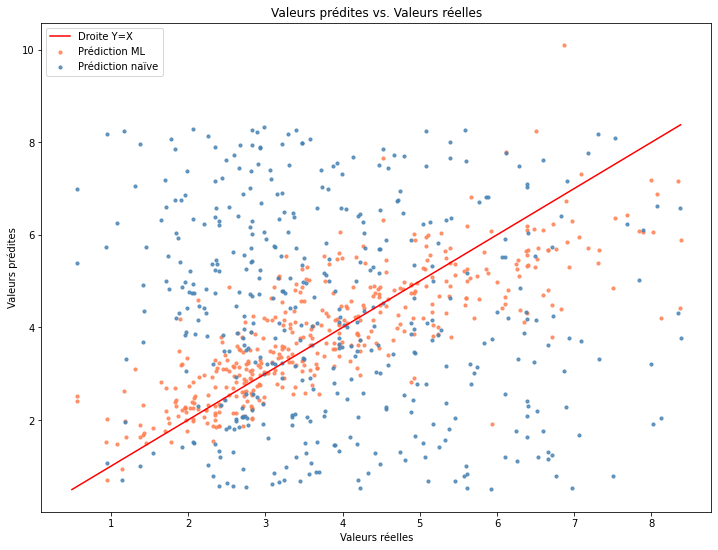

In [157]:
lr = linear_model.LinearRegression()
#Couper [0, 1, ..., n-1] en k parties de taille (n/k). (La dernière partie sera un peu plus petite si n n'est pas un multiple de k)
kf = model_selection.KFold(n_splits=5)

#initialisation du tableau de moyenne
moyenne_k_folds_validation = []

start_time = timeit.default_timer()

#for i=0 to (k-1):
for train, validation in kf.split(X_train):
    #Former le jeu de test (X_test_linear, y_test_linear) en restreignant X et y aux indices contenus dans la i-ième partie.
    X_validation = X_train[validation]
    y_validation = y_train[validation]
    
    #Former le jeu d'entraînement (X_train_linear, y_train_linear) en restreignant X et y aux autres indices.
    X_train_cv = X_train[train]
    y_train_cv = y_train[train]
    
    #Entraîner l'algorithme sur le jeu d'entraînement
    lr.fit(X_train_cv, y_train_cv)
    
    #Utiliser le modèle ainsi obtenu pour prédire sur le jeu de test
    y_validation_pred=lr.predict(X_validation)
    
    #Calculer l'erreur du modèle en comparant les étiquettes prédites aux vraies étiquettes contenues dans y_validation
    moyenne_k_folds_validation.append(metrics.r2_score(y_validation,y_validation_pred))

elapsed = timeit.default_timer() - start_time
training = np.mean(moyenne_k_folds_validation)

y_pred=lr.predict(X_test)

test = metrics.r2_score(y_test,y_pred)
print("training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(training, test, elapsed))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred) )))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

Je graphe les coefficients attribués à chaque variable:

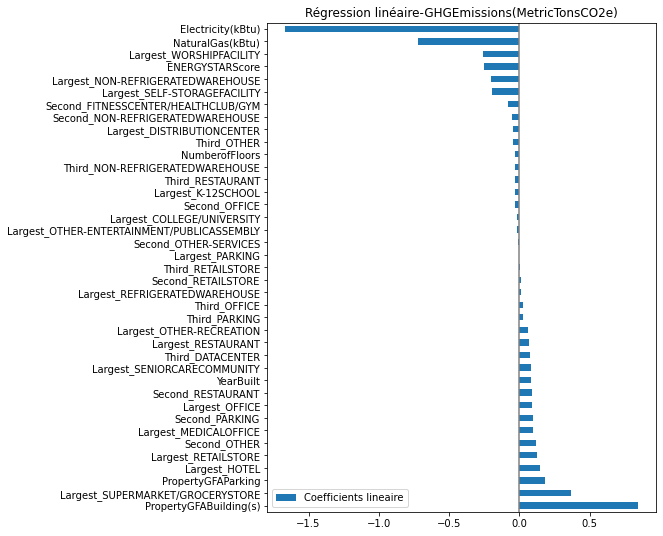

In [158]:
coefs = pd.DataFrame(
   lr.coef_,
   columns=['Coefficients lineaire'], 
   index=df_building.columns[:-2]
).sort_values(by=["Coefficients lineaire"],ascending=False)

coefs.plot(kind='barh', figsize=(9, 9))
plt.title('Régression linéaire-'+variable_a_predire)
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

J'entraîne une régression de ridge pour voir la réduction du surapprentissage.

alpha 1.6257556664437933,training-score R2 0.673, test-score R2 0.644, time 1.57s
RMSE ML: 0.971
RMSE naïf: 1.63


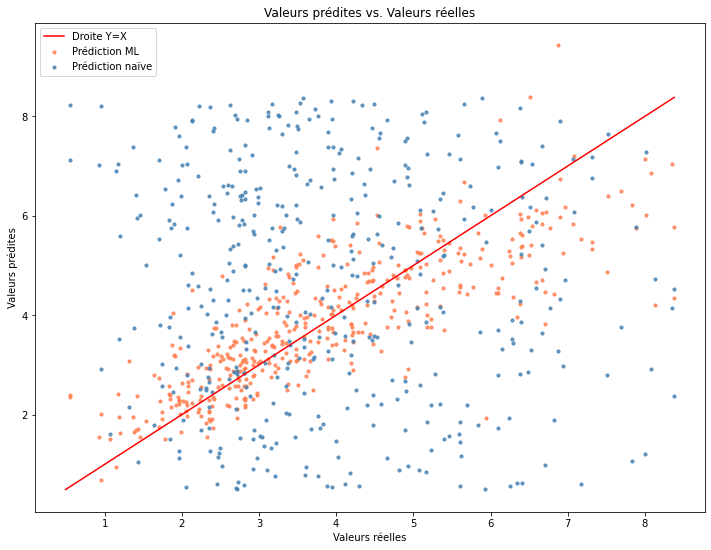

In [159]:
coefs_regul = []
errors = []

n_alphas = 200
k_folds = 5

alphas = np.logspace(-6, 6, n_alphas)
ridge = linear_model.RidgeCV(alphas,cv=k_folds, fit_intercept=True)

start_time = timeit.default_timer()

for a in alphas:
    ridge.set_params(alphas=np.array([a]))
    ridge.fit(X_train, y_train)
    coefs_regul.append(ridge.coef_)
    #errors.append(metrics.mean_squared_error(y_test, ridge.predict(X_test)))
    errors.append(((y_test - ridge.predict(X_test))** 2).sum())

#Je re-paramètre et ré-entraine la régression de Ridge avec coefficient de régularisation alpha qui donne l'erreur minimale
a=alphas[np.argmin(errors)]
ridge.set_params(alphas=[a])

ridge.fit(X_train, y_train)


elapsed = timeit.default_timer() - start_time
training = ridge.score(X_train, y_train)
test = ridge.score(X_test, y_test)
y_pred = ridge.predict(X_test)

print("alpha {},training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(a, training, test, elapsed))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred) )))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

Je graphe l'évolution des coefficients des variables et l'erreur totale en fonction des différentes valeurs d'alpha.

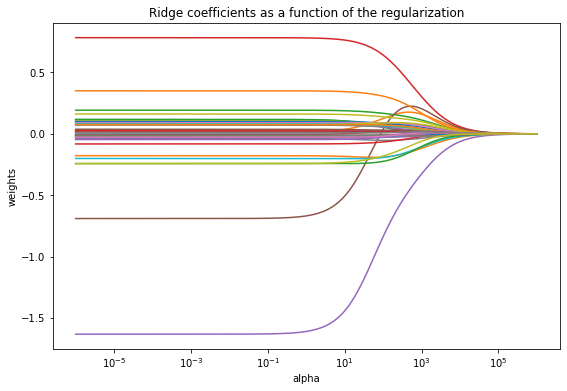

In [160]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs_regul)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

plt.show()

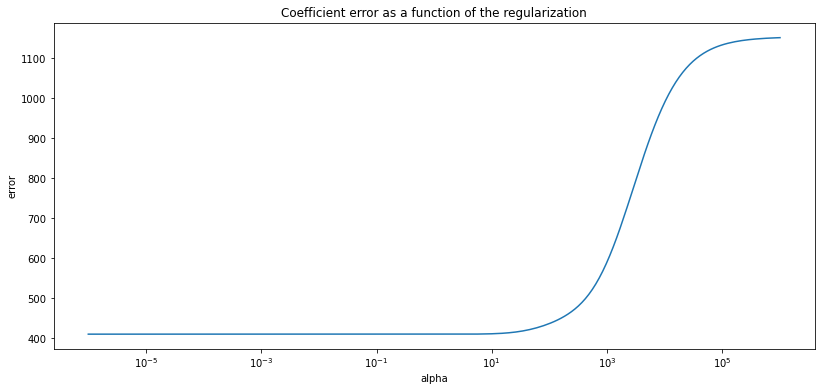

In [161]:
plt.figure(figsize=(30, 6))

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
plt.title("Coefficient error as a function of the regularization")
plt.axis("tight")

plt.show()

Je graphe le poids des différentes variables:

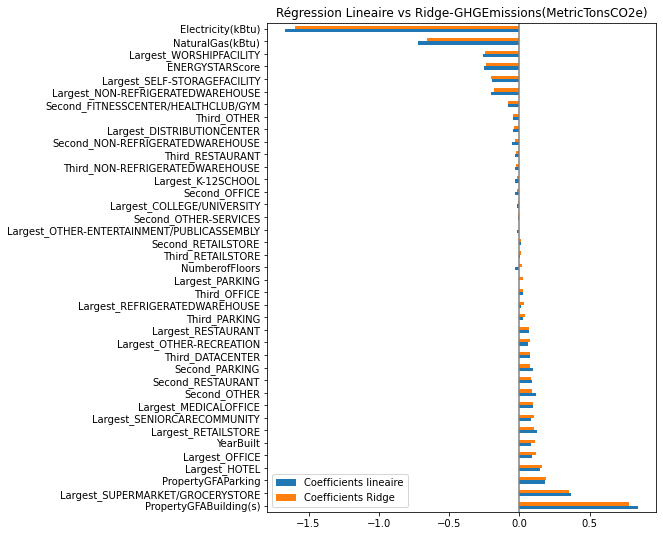

In [162]:
data = np.array([lr.coef_,ridge.coef_])

coefs = pd.DataFrame(
    data=data,
    columns=df_building.columns[:-2],
    index=['Coefficients lineaire','Coefficients Ridge']
)

coefs = coefs.transpose().sort_values(by=["Coefficients Ridge"],ascending=False)

coefs.plot(kind='barh', figsize=(9, 9))
plt.title('Régression Lineaire vs Ridge-'+variable_a_predire)
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [163]:
MoyennePoidsLineaire=np.mean(abs(coefs['Coefficients lineaire']))
MoyennePoidsRidge=np.mean(abs(coefs['Coefficients Ridge']))

print("Moyenne des poids de la régression linéaire : {:.2f}, Moyenne des poids de la régression Ridge : {:.2f}".format(MoyennePoidsLineaire, MoyennePoidsRidge))

Moyenne des poids de la régression linéaire : 0.16, Moyenne des poids de la régression Ridge : 0.16


Je fais une régression de Lasso pour identifier d'éventuelles variables qui pourraient être supprimées.

alpha : 0.01, training-score R2 0.669, test-score R2 0.646, time 2.06s
RMSE ML: 0.968
RMSE naïf: 1.63


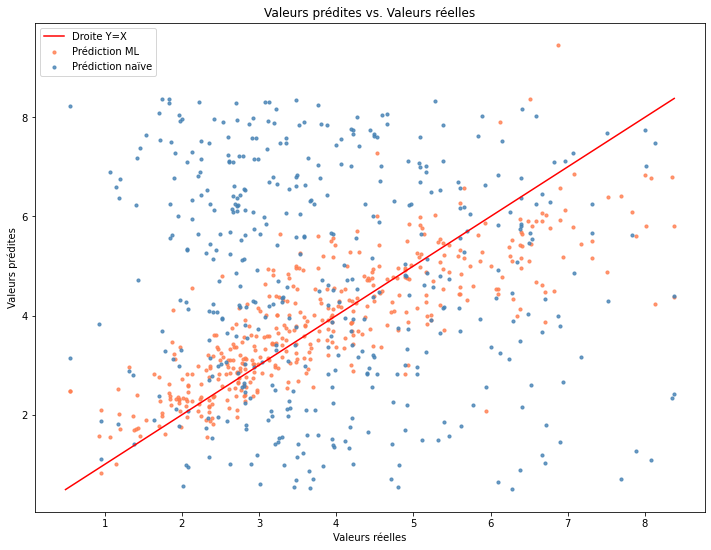

In [164]:
n_alphas = 300

alphas = []
alphas = np.logspace(-2, 2, n_alphas)
lasso = linear_model.LassoCV(fit_intercept=True,cv=k_folds)
start_time = timeit.default_timer()

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = metrics.mean_squared_error(y_test, lr.predict(X_test))

coefs = []
errors = []
errors_lasso=[]
for a in alphas:
    lasso.set_params(alphas=np.array([a]))
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors_lasso.append(metrics.mean_squared_error(y_test, lasso.predict(X_test)))
    #errors.append([baseline_error, metrics.mean_squared_error(y_test, lasso.predict(X_test))])
    errors.append(((y_test - ridge.predict(X_test))** 2).sum())

#Je re-paramètre et ré-entraine la régression Lasso avec coefficient de régularisation alpha qui donne l'erreur minimale
alpha_erreur_min = alphas[np.argmin(errors_lasso)]
lasso.set_params(alphas=np.array([alpha_erreur_min]))
lasso.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
training = lasso.score(X_train, y_train)
test = lasso.score(X_test, y_test)

y_pred=lasso.predict(X_test)

print("alpha : {}, training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(alpha_erreur_min, training, test, elapsed))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred) )))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

Je graphe l'évolution des coefficients des variables et l'erreur totale en fonction des différentes valeurs d'alpha.

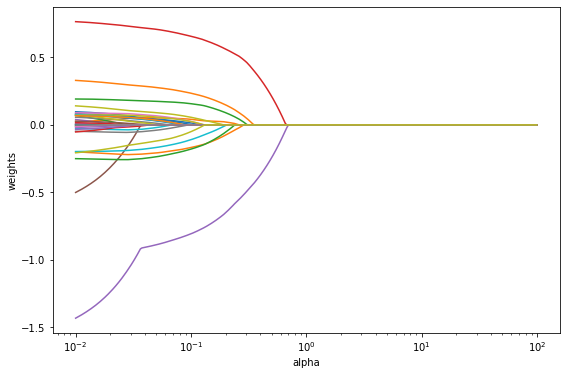

In [165]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')

plt.show()

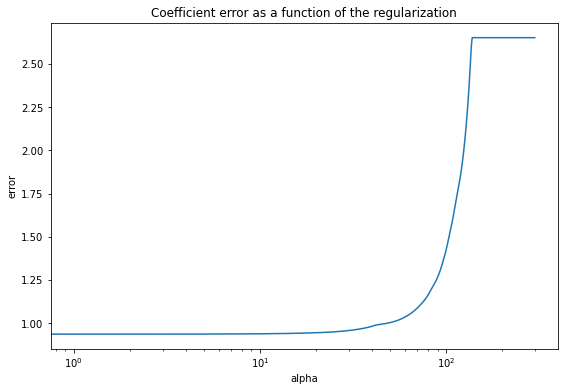

In [166]:
plt.figure(figsize=(20, 6))

plt.subplot(122)
ax = plt.gca()
ax.plot(errors_lasso)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
plt.title("Coefficient error as a function of the regularization")
plt.axis("tight")

plt.show()

Je graphe le poids des différentes variables:

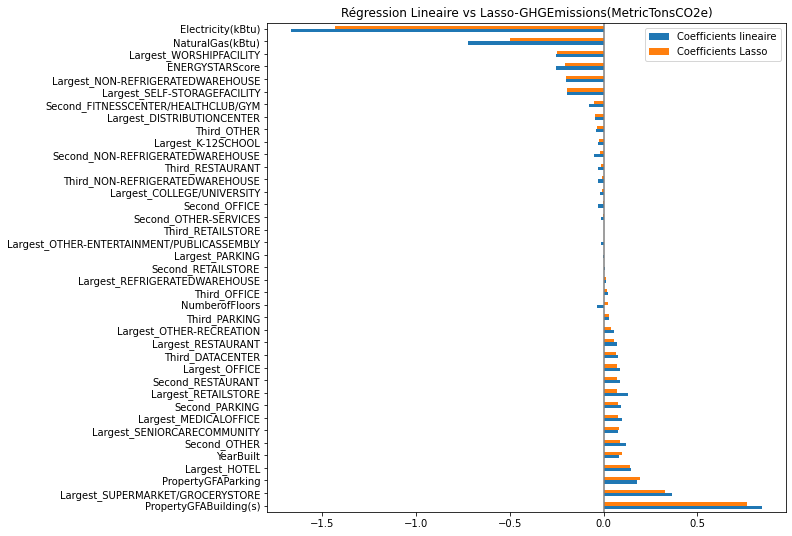

In [167]:
data = np.array([lr.coef_,lasso.coef_])

coefs = pd.DataFrame(
    data=data,
    columns=df_building.columns[:-2],
    index=['Coefficients lineaire','Coefficients Lasso']
)

coefs = coefs.transpose().sort_values(by=["Coefficients Lasso"],ascending=False)

coefs.plot(kind='barh', figsize=(12, 9))
plt.title('Régression Lineaire vs Lasso-'+variable_a_predire)
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [168]:
MinimumPoidsLineaire=np.min(abs(coefs['Coefficients lineaire']))
NbZeroPoidsRidge=coefs['Coefficients Lasso'][abs(coefs['Coefficients Lasso'])<0.005].shape[0]

print("Minimum des poids de la régression linéaire : {:.2f}, Nombre de poids à 0 avec la régression Lasso : {:.0f}.".format(MinimumPoidsLineaire, NbZeroPoidsRidge))

Minimum des poids de la régression linéaire : 0.00, Nombre de poids à 0 avec la régression Lasso : 6.


La régression Lasso fait sortir 10 variables de la régression. Autant la régression de Ridge distribuait les coefficients à peu de la même manière entre les variables qu'avec la régression linéaire, autant la régression de Lasso annule des variables qui étaient très fortement pondérées avec la régression linéaire. 

Je réalise une régression ElasticNet. 

Comme pour l'ElasticNet, il y a le l1_ratio à rechercher en plus du coefficient alpha, j'utilise une grille de recherche pour parcourir les différentes valeurs possibles.

training-score R2 0.642, test-score R2 0.623, time 28.24s
RMSE ML: 0.999
RMSE naïf: 1.63


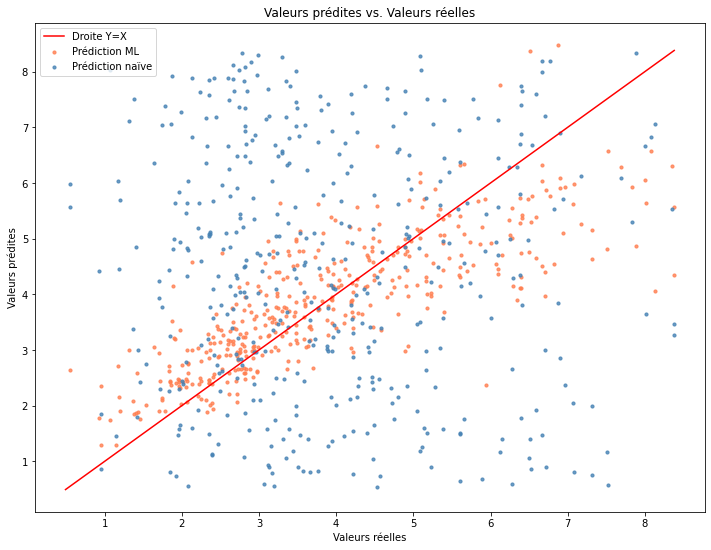

In [169]:
# valeurs du paramètre alpha
n_alphas = 200
alpha_range = np.logspace(-1, 2, n_alphas)

#valeurs du paramètre l1_ratio
l1_ratio = np.linspace(0.1, 0.99, 100)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio}

# score pour sélectionner le modèle optimal
score = 'r2'

start_time = timeit.default_timer()

linear_model.ElasticNet()

grid_pred = model_selection.GridSearchCV(
        linear_model.ElasticNet(),
        param_grid,
        cv=k_folds,
        n_jobs=-1,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
training = grid_pred.score(X_train, y_train)
test = grid_pred.score(X_test, y_test)

y_pred=grid_pred.predict(X_test)

print("training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(training, test, elapsed))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred) )))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

In [170]:
grid_pred.best_params_


{'alpha': 0.1, 'l1_ratio': 0.1}

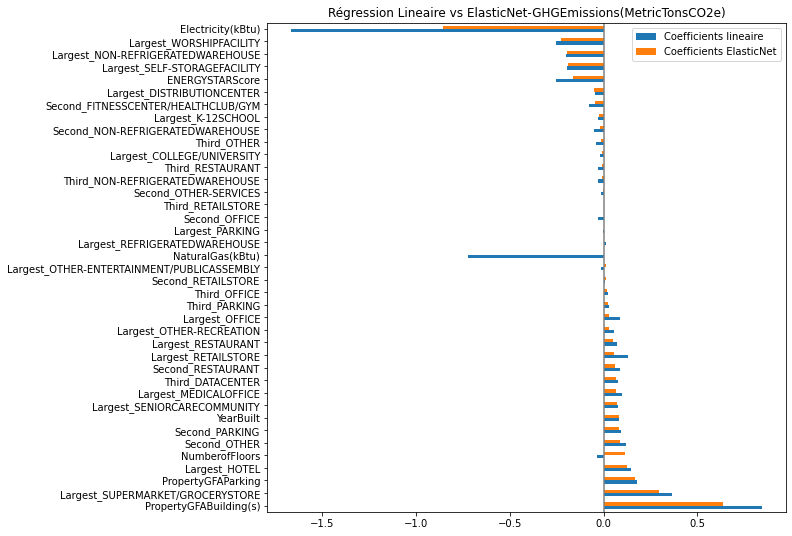

In [171]:
data = np.array([lr.coef_,grid_pred.best_estimator_.coef_])

coefs = pd.DataFrame(
    data=data,
    columns=df_building.columns[:-2],
    index=['Coefficients lineaire','Coefficients ElasticNet']
)

coefs = coefs.transpose().sort_values(by=["Coefficients ElasticNet"],ascending=False)

coefs.plot(kind='barh', figsize=(12, 9))
plt.title('Régression Lineaire vs ElasticNet-'+variable_a_predire)
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [172]:
MinimumPoidsLineaire=np.min(abs(coefs['Coefficients lineaire']))
NbZeroPoidsRidge=coefs['Coefficients ElasticNet'][abs(coefs['Coefficients ElasticNet'])<0.005].shape[0]

print("Minimum des poids de la régression linéaire : {:.2f}, Nombre de poids à 0 avec la régression ElasticNet : {:.0f}.".format(MinimumPoidsLineaire, NbZeroPoidsRidge))

Minimum des poids de la régression linéaire : 0.00, Nombre de poids à 0 avec la régression ElasticNet : 6.


In [173]:
MoyennePoidsLineaire=np.mean(abs(coefs['Coefficients lineaire']))
MoyennePoidsElasticNet=np.mean(abs(coefs['Coefficients ElasticNet']))

print("Moyenne des poids de la régression linéaire : {:.2f}, Moyenne des poids de la régression ElasticNet : {:.2f}".format(MoyennePoidsLineaire, MoyennePoidsElasticNet))

Moyenne des poids de la régression linéaire : 0.16, Moyenne des poids de la régression ElasticNet : 0.10


La régression ElasticNet retire 10 variables de la régression et réduit aussi le surapprentissage;

Régression avec des méthodes non-linéaires

Entrainement et évaluation d'une régression de ridge à noyau 'rbf'

training-score R2 0.845, test-score R2 0.741, time 57.83s
kernel : rbf, alpha : 0.016768, gamma 0.002862
RMSE ML: 0.828
RMSE naïf: 1.63


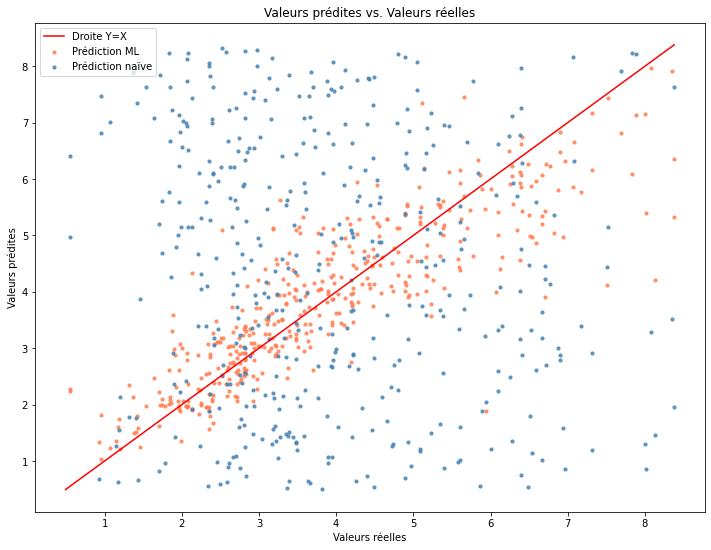

In [174]:
# valeurs du paramètre alpha
alpha_range = np.logspace(-3, 0, 50)

# valeurs du paramètre gamma
gamma_range = np.linspace(0.001, 0.01, 30)

#Liste des kernels à tester
kernel_range = np.array(['rbf'])

# grille de paramètres
param_grid = {
    'alpha': alpha_range, 
    'gamma': gamma_range, 
    'kernel': kernel_range
}

# score pour sélectionner le modèle optimal
score = 'r2'

start_time = timeit.default_timer()

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(),
        param_grid,
        n_jobs=-1,
        cv=k_folds,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
training = grid_pred.score(X_train, y_train)
test = grid_pred.score(X_test, y_test)

y_pred=grid_pred.predict(X_test)

print("training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(training, test, elapsed))
print("kernel : {}, alpha : {:.6f}, gamma {:.6f}".format(grid_pred.best_params_['kernel'],grid_pred.best_params_['alpha'], grid_pred.best_params_['gamma']))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred) )))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

Entrainement et évaluation d'une régression de ridge à noyau 'laplacian'

training-score R2 0.910, test-score R2 0.777, time 52.98s
kernel : laplacian, alpha : 0.020236, gamma 0.010000
RMSE ML: 0.769
RMSE naïf: 1.63


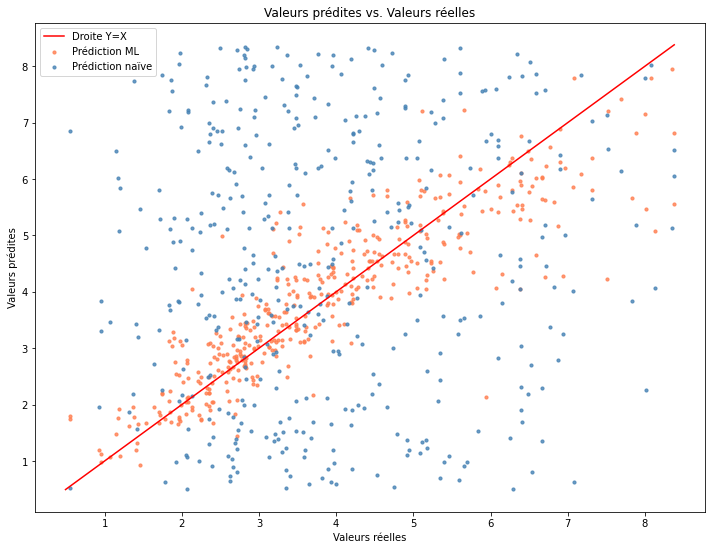

In [175]:
# valeurs du paramètre alpha
alpha_range = np.logspace(-2, 1, 50)

# valeurs du paramètre gamma
gamma_range = np.linspace(0.01, 0.1, 30)

#Liste des kernels à tester
kernel_range = np.array(['laplacian'])

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range, 'kernel': kernel_range}

# score pour sélectionner le modèle optimal
score = 'r2'

start_time = timeit.default_timer()

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(),
        param_grid,
        n_jobs=-1,
        cv=k_folds,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
training = grid_pred.score(X_train, y_train)
test = grid_pred.score(X_test, y_test)

y_pred=grid_pred.predict(X_test)

print("training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(training, test, elapsed))
print("kernel : {}, alpha : {:.6f}, gamma {:.6f}".format(grid_pred.best_params_['kernel'],grid_pred.best_params_['alpha'], grid_pred.best_params_['gamma']))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred) )))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

Entrainement et évaluation d'une régression de ridge à noyau 'polynomial'

training-score R2 0.837, test-score R2 0.744, time 51.32s
kernel : polynomial, alpha : 0.004498, gamma 0.001000
RMSE ML: 0.769
RMSE naïf: 1.63


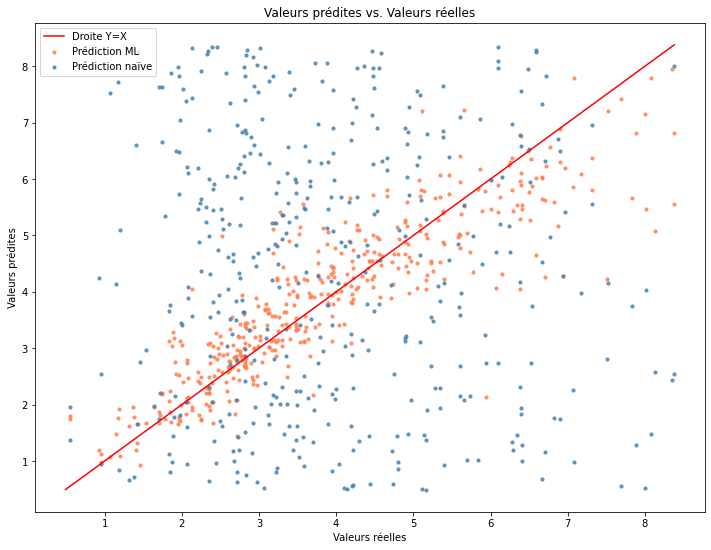

In [176]:
# valeurs du paramètre alpha
alpha_range = np.logspace(-3, 1, 50)

# valeurs du paramètre gamma
gamma_range = np.linspace(0.001, 0.01, 30)

#Liste des kernels à tester
kernel_range = np.array(['polynomial'])

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range,'kernel': kernel_range}

# score pour sélectionner le modèle optimal
score = 'r2'

start_time = timeit.default_timer()

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(),
        param_grid,
        n_jobs=-1,
        cv=k_folds,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
training = grid_pred.score(X_train, y_train)
test = grid_pred.score(X_test, y_test)

ypred=grid_pred.predict(X_test)

print("training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(training, test, elapsed))
print("kernel : {}, alpha : {:.6f}, gamma {:.6f}".format(grid_pred.best_params_['kernel'],grid_pred.best_params_['alpha'], grid_pred.best_params_['gamma']))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred) )))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

Entrainement et évaluation d'une régression basée sur les k-nearest neighbors

training-score R2 0.511, test-score R2 0.412, time 0.28s
n_neighbors : 10
RMSE ML: 1.247
RMSE naïf: 1.63


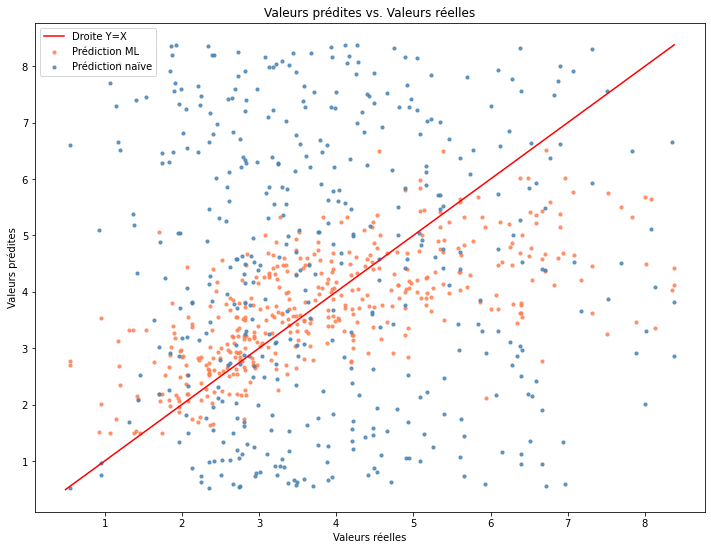

In [177]:
# valeurs du paramètre C
n_neighbors= np.arange(1,40)

# grille de paramètres
param_grid = {'n_neighbors': n_neighbors}

# score pour sélectionner le modèle optimal
score = 'r2'

start_time = timeit.default_timer()

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        neighbors.KNeighborsRegressor(),
        param_grid,
        n_jobs=-1,
        cv=k_folds,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
training = grid_pred.score(X_train, y_train)
test = grid_pred.score(X_test, y_test)

y_pred=grid_pred.predict(X_test)

print("training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(training, test, elapsed))
print("n_neighbors : {}".format(grid_pred.best_params_['n_neighbors']))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred) )))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

J'entraîne des modèle SVR avec différents noyaux

training-score R2 0.908, test-score R2 0.693, time 31.52s
C : 20.202970
RMSE ML: 0.901
RMSE naïf: 1.63


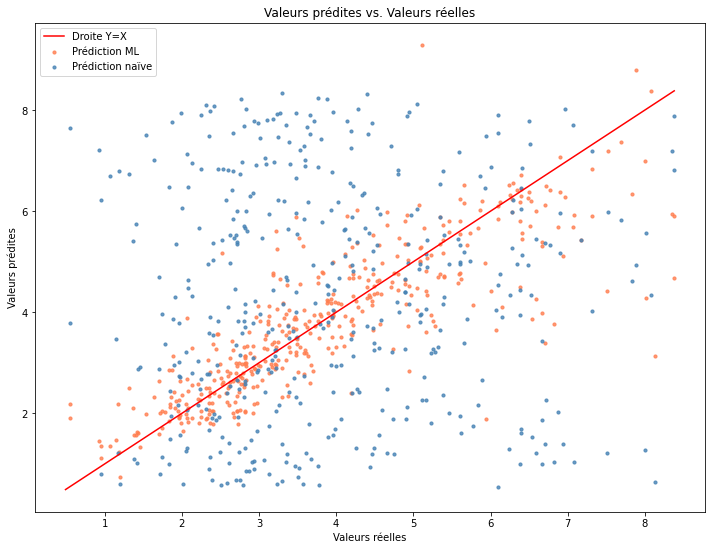

In [178]:
# valeurs du paramètre C
C_range=np.linspace(0.001, 400, 100)

# valeurs du noyau
kernel = ['rbf']

# grille de paramètres
param_grid = {
    'C': C_range, 
    'kernel': kernel}

# score pour sélectionner le modèle optimal
score = 'r2'

start_time = timeit.default_timer()

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        svm.SVR(),
        param_grid,
        n_jobs=-1,
        cv=k_folds,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
training = grid_pred.score(X_train, y_train)
test = grid_pred.score(X_test, y_test)

y_pred=grid_pred.predict(X_test)

print("training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(training, test, elapsed))
print("C : {:.6f}".format(grid_pred.best_params_['C']))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

training-score R2 0.800, test-score R2 0.612, time 38.07s
C : 8.081798
RMSE ML: 1.013
RMSE naïf: 1.63


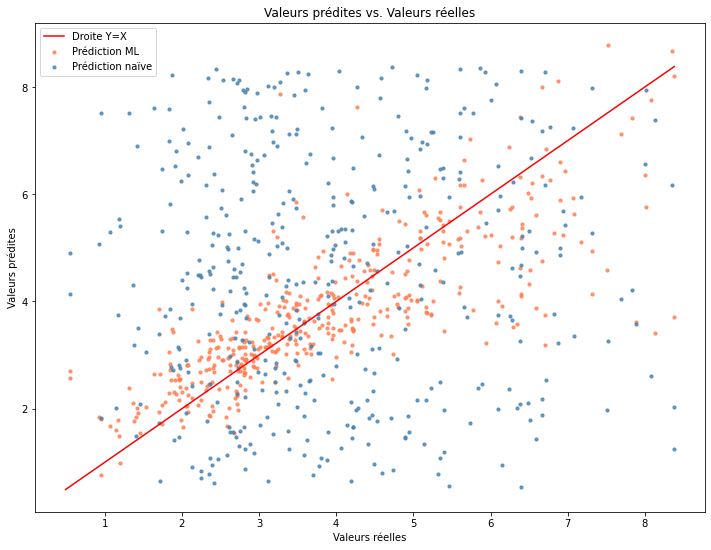

In [179]:
# valeurs du paramètre C
C_range=np.linspace(0.001, 800, 100)

# valeurs du noyau
kernel = ['poly']

# grille de paramètres
param_grid = {
    'C': C_range, 
    'kernel': kernel
}

# score pour sélectionner le modèle optimal
score = 'r2'

start_time = timeit.default_timer()

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        svm.SVR(),
        param_grid,
        n_jobs=-1,
        cv=k_folds,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
training = grid_pred.score(X_train, y_train)
test = grid_pred.score(X_test, y_test)

y_pred=grid_pred.predict(X_test)

print("training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(training, test, elapsed))
print("C : {:.6f}".format(grid_pred.best_params_['C']))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

training-score R2 0.641, test-score R2 0.620, time 670.11s
C : 1.011091
RMSE ML: 1.002
RMSE naïf: 1.63


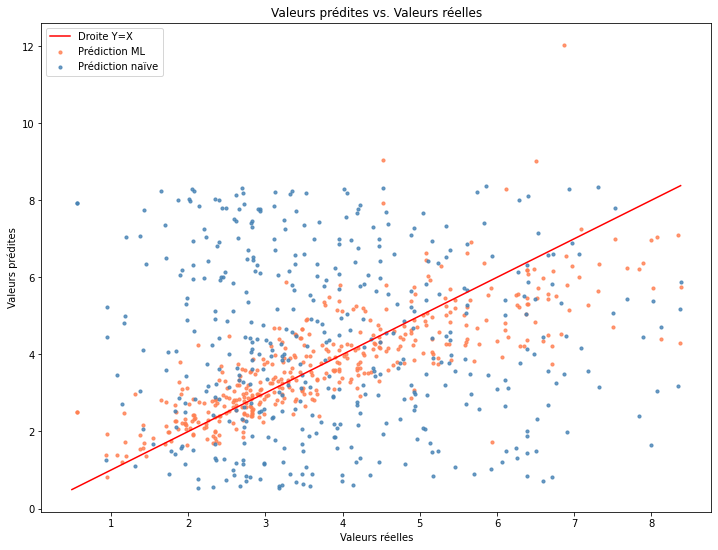

In [188]:
# valeurs du paramètre C
C_range=np.linspace(0.001, 100, 100)

# valeurs du noyau
kernel = ['linear']

# grille de paramètres
param_grid = {
    
              'C': C_range, 
              'kernel': kernel
             }

# score pour sélectionner le modèle optimal
score = 'r2'

start_time = timeit.default_timer()

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        svm.SVR(),
        param_grid,
        n_jobs=-1,
        cv=k_folds,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
training = grid_pred.score(X_train, y_train)
test = grid_pred.score(X_test, y_test)

y_pred=grid_pred.predict(X_test)

print("training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(training, test, elapsed))
print("C : {:.6f}".format(grid_pred.best_params_['C']))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

Le meilleure résultat est obtenu par la SVR à noyau rbf

Je vais essayer d'améliorer mes prédictions par l'utilisation de méthodes ensemblistes.

J'entraîne un RandomForestRegressor

training-score 0.887, test-score 0.705, time 126.45s
criterion : mse, max_depth : 9, min_samples_leaf : 2
RMSE ML: 0.883
RMSE naïf: 1.63


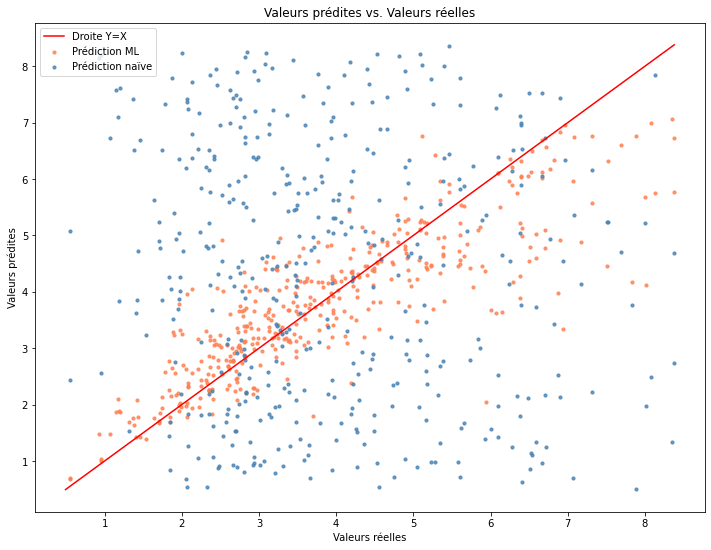

In [181]:
n_estimators=[80,100,120]

max_depth=np.arange(3,10)

criterion=['mae', 'mse']

min_samples_leaf=np.arange(2,4)


# grille de paramètres
param_grid = {
    'criterion':criterion,
    'n_estimators':n_estimators,
    'max_depth':max_depth, 
    'min_samples_leaf':min_samples_leaf,
    'n_jobs':[-1],
    'oob_score': [True]
}

start_time = timeit.default_timer()

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        RandomForestRegressor(),
        param_grid,
        n_jobs=-1,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train, y_train)


elapsed = timeit.default_timer() - start_time
training = grid_pred.score(X_train, y_train)
test = grid_pred.score(X_test, y_test)

y_pred=grid_pred.predict(X_test)

print("training-score {:.3f}, test-score {:.3f}, time {:.2f}s".format(training, test, elapsed))
print("criterion : {}, max_depth : {:.0f}, min_samples_leaf : {:.0f}".format(grid_pred.best_params_['criterion'],grid_pred.best_params_['max_depth'], grid_pred.best_params_['min_samples_leaf']))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

In [182]:
grid_pred.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'n_estimators': 80,
 'n_jobs': -1,
 'oob_score': True}

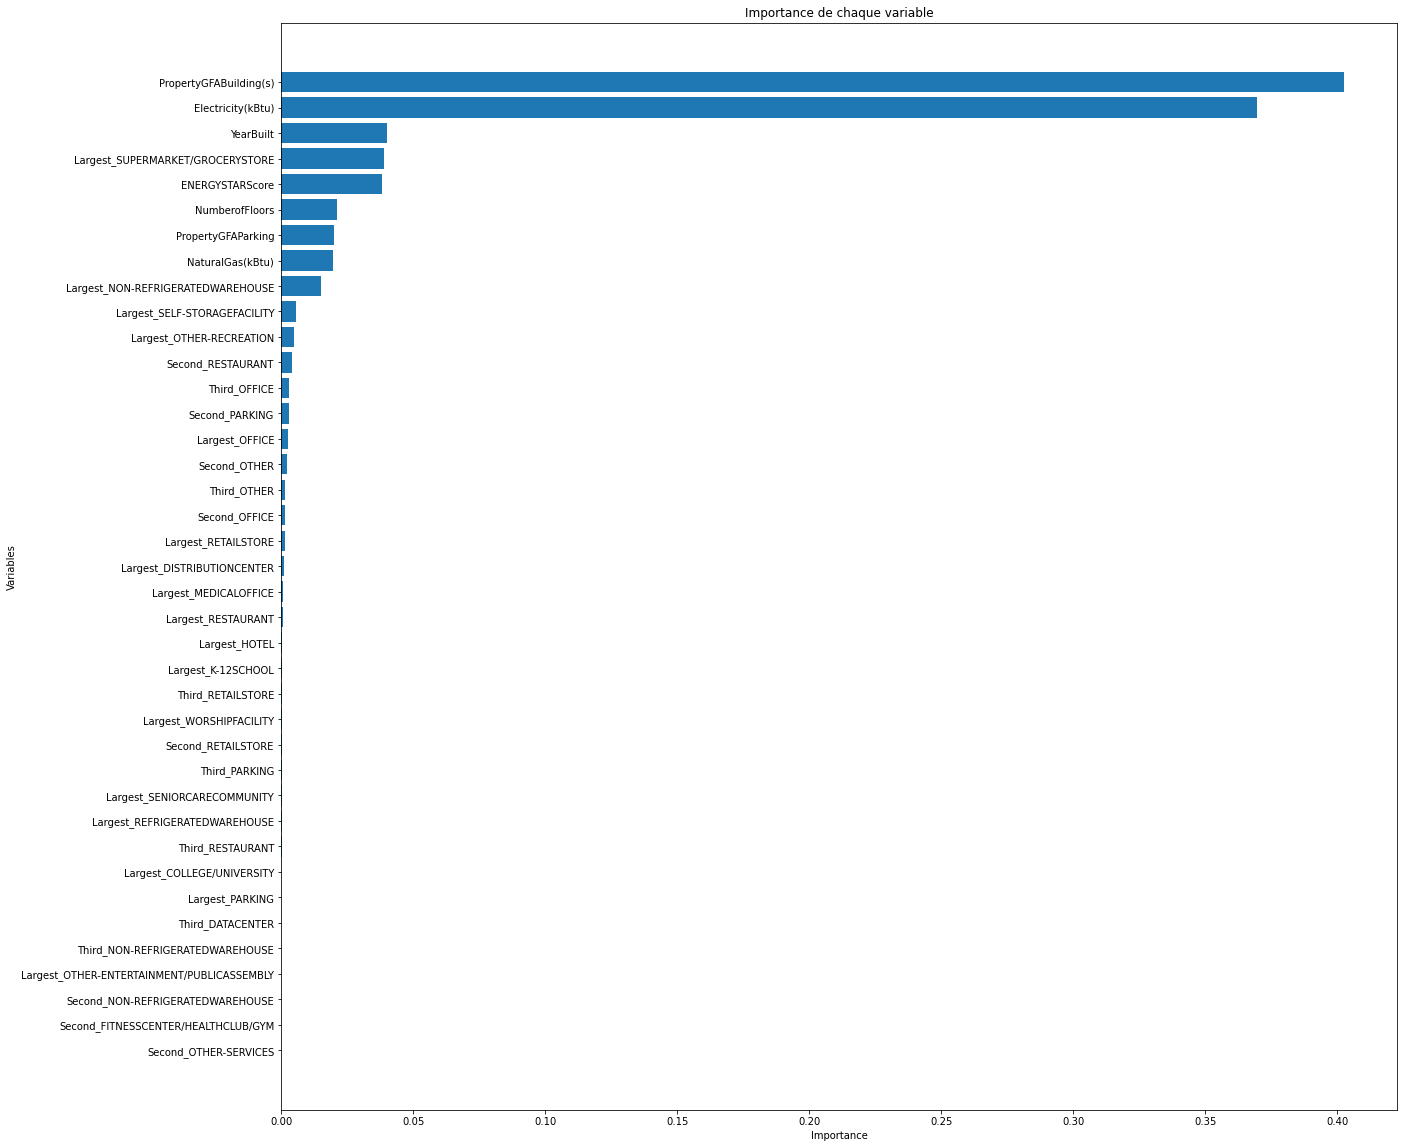

In [183]:
importances=grid_pred.best_estimator_.feature_importances_
variables=df_building.columns[:-2]

variable_importance=pd.DataFrame(data=[importances],columns=variables, index= ['importance'])
variable_importance=variable_importance.transpose()
variable_importance=variable_importance.sort_values(by=["importance"],ascending=True)

fig = plt.figure(figsize=(20, 20))
  
# creating the bar plot
plt.barh(variable_importance.index, variable_importance["importance"])
  
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title("Importance de chaque variable")
plt.show()

J'entraine un GradientBoostingRegressor

Optimisation du modèle choisi GradientBoostingRegressor en ajustant le learning_rateet n_estimators

training-score R2 0.920, test-score R2 0.768, time 26.48s
RMSE ML: 0.783
RMSE naïf: 1.63


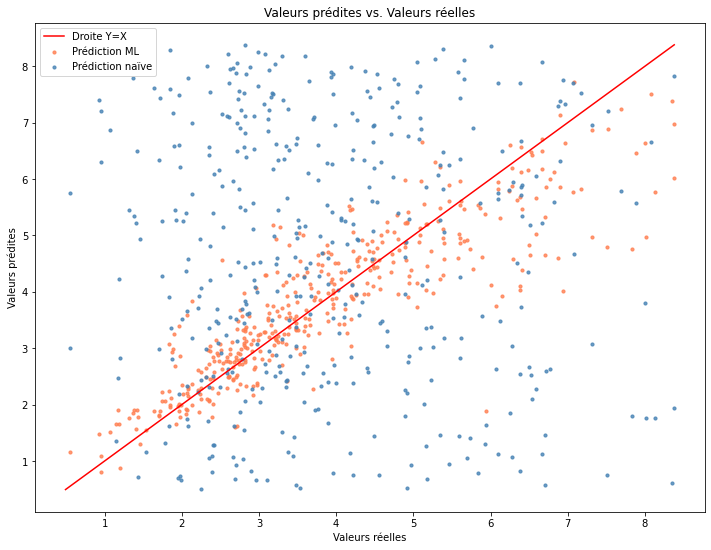

In [184]:
max_depth=np.arange(3, 6)

min_samples_leaf=np.arange(1,5)

max_features =['auto']

loss=['ls']

learning_rate=np.linspace(0.05,0.1,6)
n_estimators = [80,100,120]

# grille de paramètres
param_grid = {
    'loss':loss,
    'learning_rate':learning_rate,
    'n_estimators':n_estimators,
    'max_depth':max_depth, 
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

start_time = timeit.default_timer()

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        GradientBoostingRegressor(),
        param_grid,
        n_jobs=-1,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
training = grid_pred.score(X_train, y_train)
test = grid_pred.score(X_test, y_test)

y_pred=grid_pred.predict(X_test)

print("training-score R2 {:.3f}, test-score R2 {:.3f}, time {:.2f}s".format(training, test, elapsed))
print("RMSE ML: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
RMSE_naif(X_train,y_train,X_test,y_test)
graphique_prediction_vs_naif(y,y_test,y_pred)

In [185]:
grid_pred.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 120}

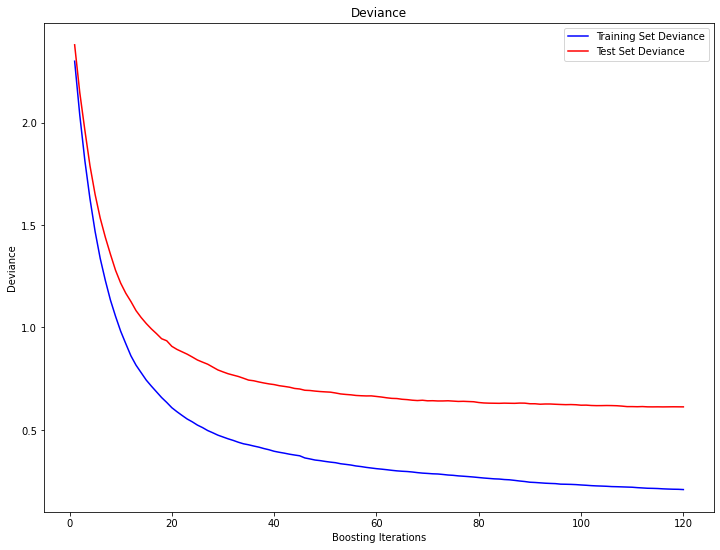

In [186]:
diagnose(grid_pred.best_estimator_,grid_pred.best_params_)

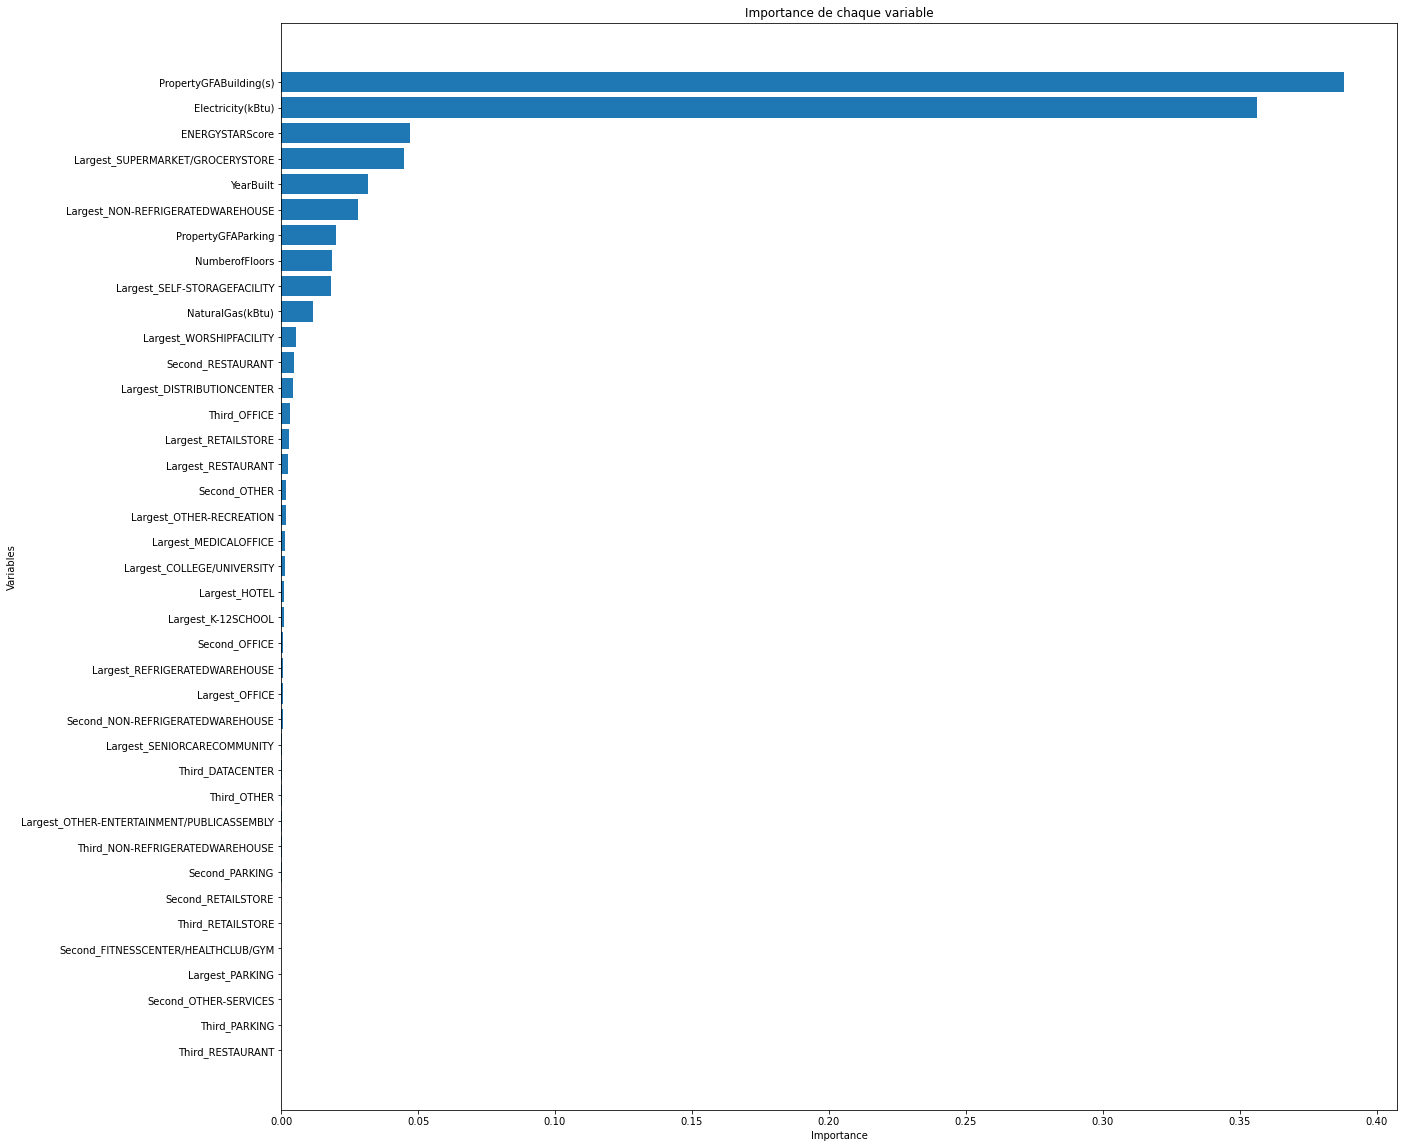

In [187]:
importances=grid_pred.best_estimator_.feature_importances_
variables=df_building.columns[:-2]

variable_importance=pd.DataFrame(data=[importances],columns=variables, index= ['importance'])
variable_importance=variable_importance.transpose()
variable_importance=variable_importance.sort_values(by=["importance"],ascending=True)

fig = plt.figure(figsize=(20, 20))
  
# creating the bar plot
plt.barh(variable_importance.index, variable_importance["importance"])
  
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title("Importance de chaque variable")
plt.show()